___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
(Waad and Noof)
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [44]:
#import important libraries 
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc, precision_recall_curve,plot_precision_recall
import xgboost as xgb
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_validate, GridSearchCV ,cross_val_score, cross_validate ,RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
    roc_auc_score,
)


#since we have a huge number of features this line show all rows and columns 
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 80000)

plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
# import dataframes
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="ISO-8859-1")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="ISO-8859-1")
# merge dataframes
df = pd.concat([df_male, df_female])
df = df.reset_index()
df

# Copy dataframe for manipulating
df_copy = df.copy()

In [3]:
df_copy

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,

In [4]:
# Height and weight are repeated
## drop the self_reported
## Convert the unit
df_copy.loc[:, ["weightkg", "Weightlbs", "Heightin", "stature"]]
df_copy["weightkg"] = df_copy["weightkg"] / 10
df_copy

,index,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,81.500,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,72.600,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,92.900,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,79.400,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279

In [5]:
columns_to_keep = ['acromialheight', 'acromionradialelength', 'axillaheight', 'balloffootlength',
                   'biacromialbreadth', 'bitragionchinarc', 'bizygomaticbreadth', 'buttockheight',
                   'buttockkneelength', 'buttockpopliteallength', 'cervicaleheight', 'chestbreadth',
                   'chestheight', 'crotchheight', 'earlength', 'earprotrusion', 'elbowrestheight',
                   'eyeheightsitting', 'forearmcenterofgriplength', 'forearmforearmbreadth',
                   'forearmhandlength', 'handbreadth', 'handlength', 'headbreadth', 'headcircumference',
                   'headlength', 'heelbreadth', 'iliocristaleheight', 'interscyei', 'interscyeii',
                   'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight',
                   'lateralmalleolusheight', 'neckcircumference', 'neckcircumferencebase',
                   'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength',
                   'shoulderelbowlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span',
                   'stature', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance',
                   'thumbtipreach', 'tibialheight', 'tragiontopofhead', 'trochanterionheight',
                   'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference',
                   'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference', 'wristheight',
                   'SubjectsBirthLocation', 'Age', 'Gender', 'WritingPreference', 'DODRace']

df_partial = df_copy[columns_to_keep]

## Explore Data

In [6]:
df_partial.describe(include="O").T

,count,unique,top,freq
SubjectsBirthLocation,6068,152,California,446
Gender,6068,2,Male,4082
WritingPreference,6068,3,Right hand,5350


In [7]:
df_partial["WritingPreference"].value_counts()

WritingPreference
Right hand                     5350
Left hand                       656
Either hand (No preference)      62
Name: count, dtype: int64

In [8]:
df_partial["SubjectsBirthLocation"]

0         North Dakota
1             New York
2             New York
3            Wisconsin
4       North Carolina
             ...      
6063             Texas
6064             Texas
6065             Texas
6066             Texas
6067             Texas
Name: SubjectsBirthLocation, Length: 6068, dtype: object

In [9]:
# Look for DODRace with >= 500 observations
df_partial.groupby("DODRace").count()

,acromialheight,acromionradialelength,axillaheight,balloffootlength,biacromialbreadth,bitragionchinarc,bizygomaticbreadth,buttockheight,buttockkneelength,buttockpopliteallength,cervicaleheight,chestbreadth,chestheight,crotchheight,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,forearmforearmbreadth,forearmhandlength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelbreadth,iliocristaleheight,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shoulderelbowlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,SubjectsBirthLocation,Age,Gender,WritingPreference
DODRace,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792
2,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
3,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679,679
4,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
5,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
6,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [10]:
# Just DODRace with > 500 observations
df_partial = df_partial.query("DODRace in [1, 2, 3]")
df_partial.groupby("DODRace").count()
df_partial

,acromialheight,acromionradialelength,axillaheight,balloffootlength,biacromialbreadth,bitragionchinarc,bizygomaticbreadth,buttockheight,buttockkneelength,buttockpopliteallength,cervicaleheight,chestbreadth,chestheight,crotchheight,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,forearmforearmbreadth,forearmhandlength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelbreadth,iliocristaleheight,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shoulderelbowlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,SubjectsBirthLocation,Age,Gender,WritingPreference,DODRace
0,1467,337,1347,202,401,319,142,882,619,509,1535,291,1292,877,71,19,247,802,349,575,477,90,193,150,583,206,70,1071,422,441,502,560,500,77,400,436,1447,113,437,273,368,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,440,1054,175,853,North Dakota,41,Male,Right hand,1
1,1395,326,1293,193,394,344,135,870,584,468,1471,269,1244,851,62,18,232,781,348,523,476,86,195,146,568,201,72,1046,441,447,490,540,488,73,380,420,1380,118,417,254,353,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,371,1054,167,815,New York,35,Male,Left hand,1
2,1430,341,1327,196,427,345,135,901,623,506,1501,288,1288,854,61,23,237,810,355,575,491,93,203,148,573,202,70,1053,462,475,496,556,482,72,403,434,1447,121,431,268,367,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,411,1041,180,831,New York,42,Male,Left hand,2
3,1347,310,1239,199,401,328,143,821,560,437,1423,296,1205,769,66,25,272,794,352,593,467,91,194,158,576,199,68,986,458,461,460,511,452,76,407,446,1357,118,393,249,330,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,399,968,176,793,Wisconsin,31,Male,Right hand,1
4,1585,372,1478,224,435,340,138,1080,706,567,1684,304,1452,1014,56,19,188,814,399,605,550,94,218,153,566,197,69,1251,481,505,612,666,585,85,398,430,1572,132,523,302,400,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,379,1245,188,954,North Carolina,21,Male,Right hand,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,1392,335,1297,196,368,306,136,856,652,541,1457,290,1258,779,60,19,210,746,328,514,456,81,193,151,582,205,75,1048,373,390,462,535,486,61,369,391,1307,118,414,237,354,865,840,555,1716,1687,1391,1119,660,155,749,446,136,872,1706,447,334,1043,370,1002,162,836,Texas,51,Female,Right hand,3
6064,1324,301,1204,181,378,309,145,818,572,464,1390,291,1151,732,65,23,274,770,319,514,440,81,183,160,570,186,61,974,400,411,433,483,457,58,359,399,1323,99,377,237,318,881,794,525,1620,1613,1316,1043,616,157,721,422,131,838,1648,446,334,971,374,958,157,804,Texas,40,Female,Right hand,3
6065,1334,318,1259,183,363,317,139,846,637,525,1412,285,1166,793,62,18,204,739,338,530,459,82,191,144,559,190,72,986,400,412,450,517,476,57,352,402,1318,116,392,259,338,841,848,566,1740,1644,1337,1054,640,159,758,449,127,862,1590,444,335,982,351,970,159,774,Texas,40,Female,Right hand,2
6066,1293,302,1207,163,376,282,137,786,582,480,1377,270,1137,763,62,21,222,738,306,430,425,74,176,149,558,186,59,971,383,418,432,491,445,58,326,380,1286,111,375,230,321,854,791,530,1628,1616,1288,1028,623,163,725,419,135,802,1525,450,298,837,335,952,146,769,Texas,31,Female,Right hand,3


In [11]:
df_partial["DODRace"] = df_partial.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
    }
)

In [12]:
df_partial["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [13]:
#check missing values
df_partial.isnull().sum().sum()

0

In [14]:
# Check duplicates
df_partial.duplicated().sum()

0

In [15]:
# Calculate the correlation matrix
correlation_matrix = df_partial.corr(numeric_only=True)

pd.set_option("display.max_rows", None)
correlation_matrix
# Display the correlation matrix with colors
# print(correlation_matrix.style.background_gradient(cmap='coolwarm'))


def color_red(val):
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = "red"
    else:
        color = "black"
    return f"color: {color}"


pd.DataFrame(correlation_matrix).corr().style.applymap(color_red)


,acromialheight,acromionradialelength,axillaheight,balloffootlength,biacromialbreadth,bitragionchinarc,bizygomaticbreadth,buttockheight,buttockkneelength,buttockpopliteallength,cervicaleheight,chestbreadth,chestheight,crotchheight,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,forearmforearmbreadth,forearmhandlength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelbreadth,iliocristaleheight,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shoulderelbowlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age
acromialheight,1.000000,0.958377,0.996566,0.913747,0.735627,0.302142,0.005249,0.949649,0.875110,0.868779,0.997347,-0.043653,0.993201,0.957487,0.040568,0.031223,-0.294482,0.793291,0.927601,-0.044339,0.929375,0.697710,0.893672,-0.075069,0.115518,0.479033,0.269231,0.975209,0.031974,0.298491,0.961114,0.969961,0.943837,0.801059,0.142613,0.247982,0.958464,0.862310,0.963378,0.925584,0.965025,0.802365,0.922092,0.952292,0.945689,0.996014,0.998478,0.980400,-0.401947,-0.186273,0.922874,0.959301,0.082785,0.954957,0.284372,0.596465,-0.355920,-0.410208,0.261786,0.975901,0.602279,0.943657,-0.514500
acromionradialelength,0.958377,1.000000,0.961797,0.924161,0.725770,0.335796,0.011863,0.966708,0.914248,0.915215,0.961475,-0.095699,0.960396,0.974203,-0.015948,-0.004753,-0.512058,0.646016,0.966410,-0.068033,0.967069,0.671425,0.930514,-0.071009,0.152047,0.475749,0.359655,0.976268,0.012103,0.288639,0.973537,0.980096,0.961135,0.722846,0.115129,0.212772,0.927135,0.901210,0.969286,0.970037,0.996249,0.656421,0.948830,0.993774,0.981201,0.953596,0.962532,0.970970,-0.396890,-0.192779,0.964392,0.970530,0.077198,0.970083,0.157062,0.486799,-0.390991,-0.424651,0.122382,0.969502,0.560718,0.820018,-0.477793
axillaheight,0.996566,0.961797,1.000000,0.909129,0.698706,0.256399,-0.051430,0.965228,0.880370,0.886084,0.993466,-0.118895,0.992051,0.972495,-0.006512,0.018803,-0.342281,0.762516,0.931476,-0.119521,0.936446,0.658584,0.901602,-0.112604,0.104488,0.463171,0.250002,0.986379,-0.036600,0.237644,0.972269,0.976100,0.960583,0.771888,0.071422,0.177951,0.947670,0.868358,0.975586,0.933688,0.967324,0.773390,0.908171,0.958855,0.948455,0.993125,0.995548,0.989107,-0.445439,-0.243049,0.919976,0.972962,0.079768,0.970529,0.211853,0.535871,-0.421818,-0.472741,0.199074,0.987586,0.548108,0.928480,-0.531819
balloffootlength,0.913747,0.924161,0.909129,1.000000,0.835926,0.519917,0.208317,0.898834,0.860208,0.835928,0.928857,0.014675,0.935904,0.919180,0.033925,0.028896,-0.444559,0.655697,0.965218,0.082576,0.968280,0.821339,0.957454,0.114523,0.307195,0.614280,0.560966,0.913182,0.162298,0.430377,0.924146,0.943253,0.894410,0.758679,0.303363,0.389471,0.912544,0.947613,0.928539,0.956466,0.932669,0.670046,0.962744,0.944194,0.963332,0.920750,0.926054,0.910533,-0.326442,-0.064125,0.951723,0.905242,0.151133,0.901996,0.224170,0.543959,-0.327476,-0.356265,0.151142,0.920236,0.717235,0.784654,-0.529829
biacromialbreadth,0.735627,0.725770,0.698706,0.835926,1.000000,0.715718,0.539471,0.619367,0.596396,0.515822,0.770029,0.412964,0.768311,0.656889,0.337024,0.239329,-0.160280,0.718740,0.778296,0.476984,0.760389,0.938516,0.732547,0.397563,0.374727,0.669032,0.550276,0.660310,0.586547,0.794981,0.674827,0.718060,0.603518,0.818541,0.695528,0.763271,0.835817,0.739057,0.698711,0.751852,0.755584,0.722208,0.896696,0.738477,0.795249,0.761262,0.755266,0.658253,-0.149520,0.189415,0.803772,0.641680,0.226304,0.627742,0.482808,0.746241,-0.000200,-0.039690,0.435773,0.683472,0.92276

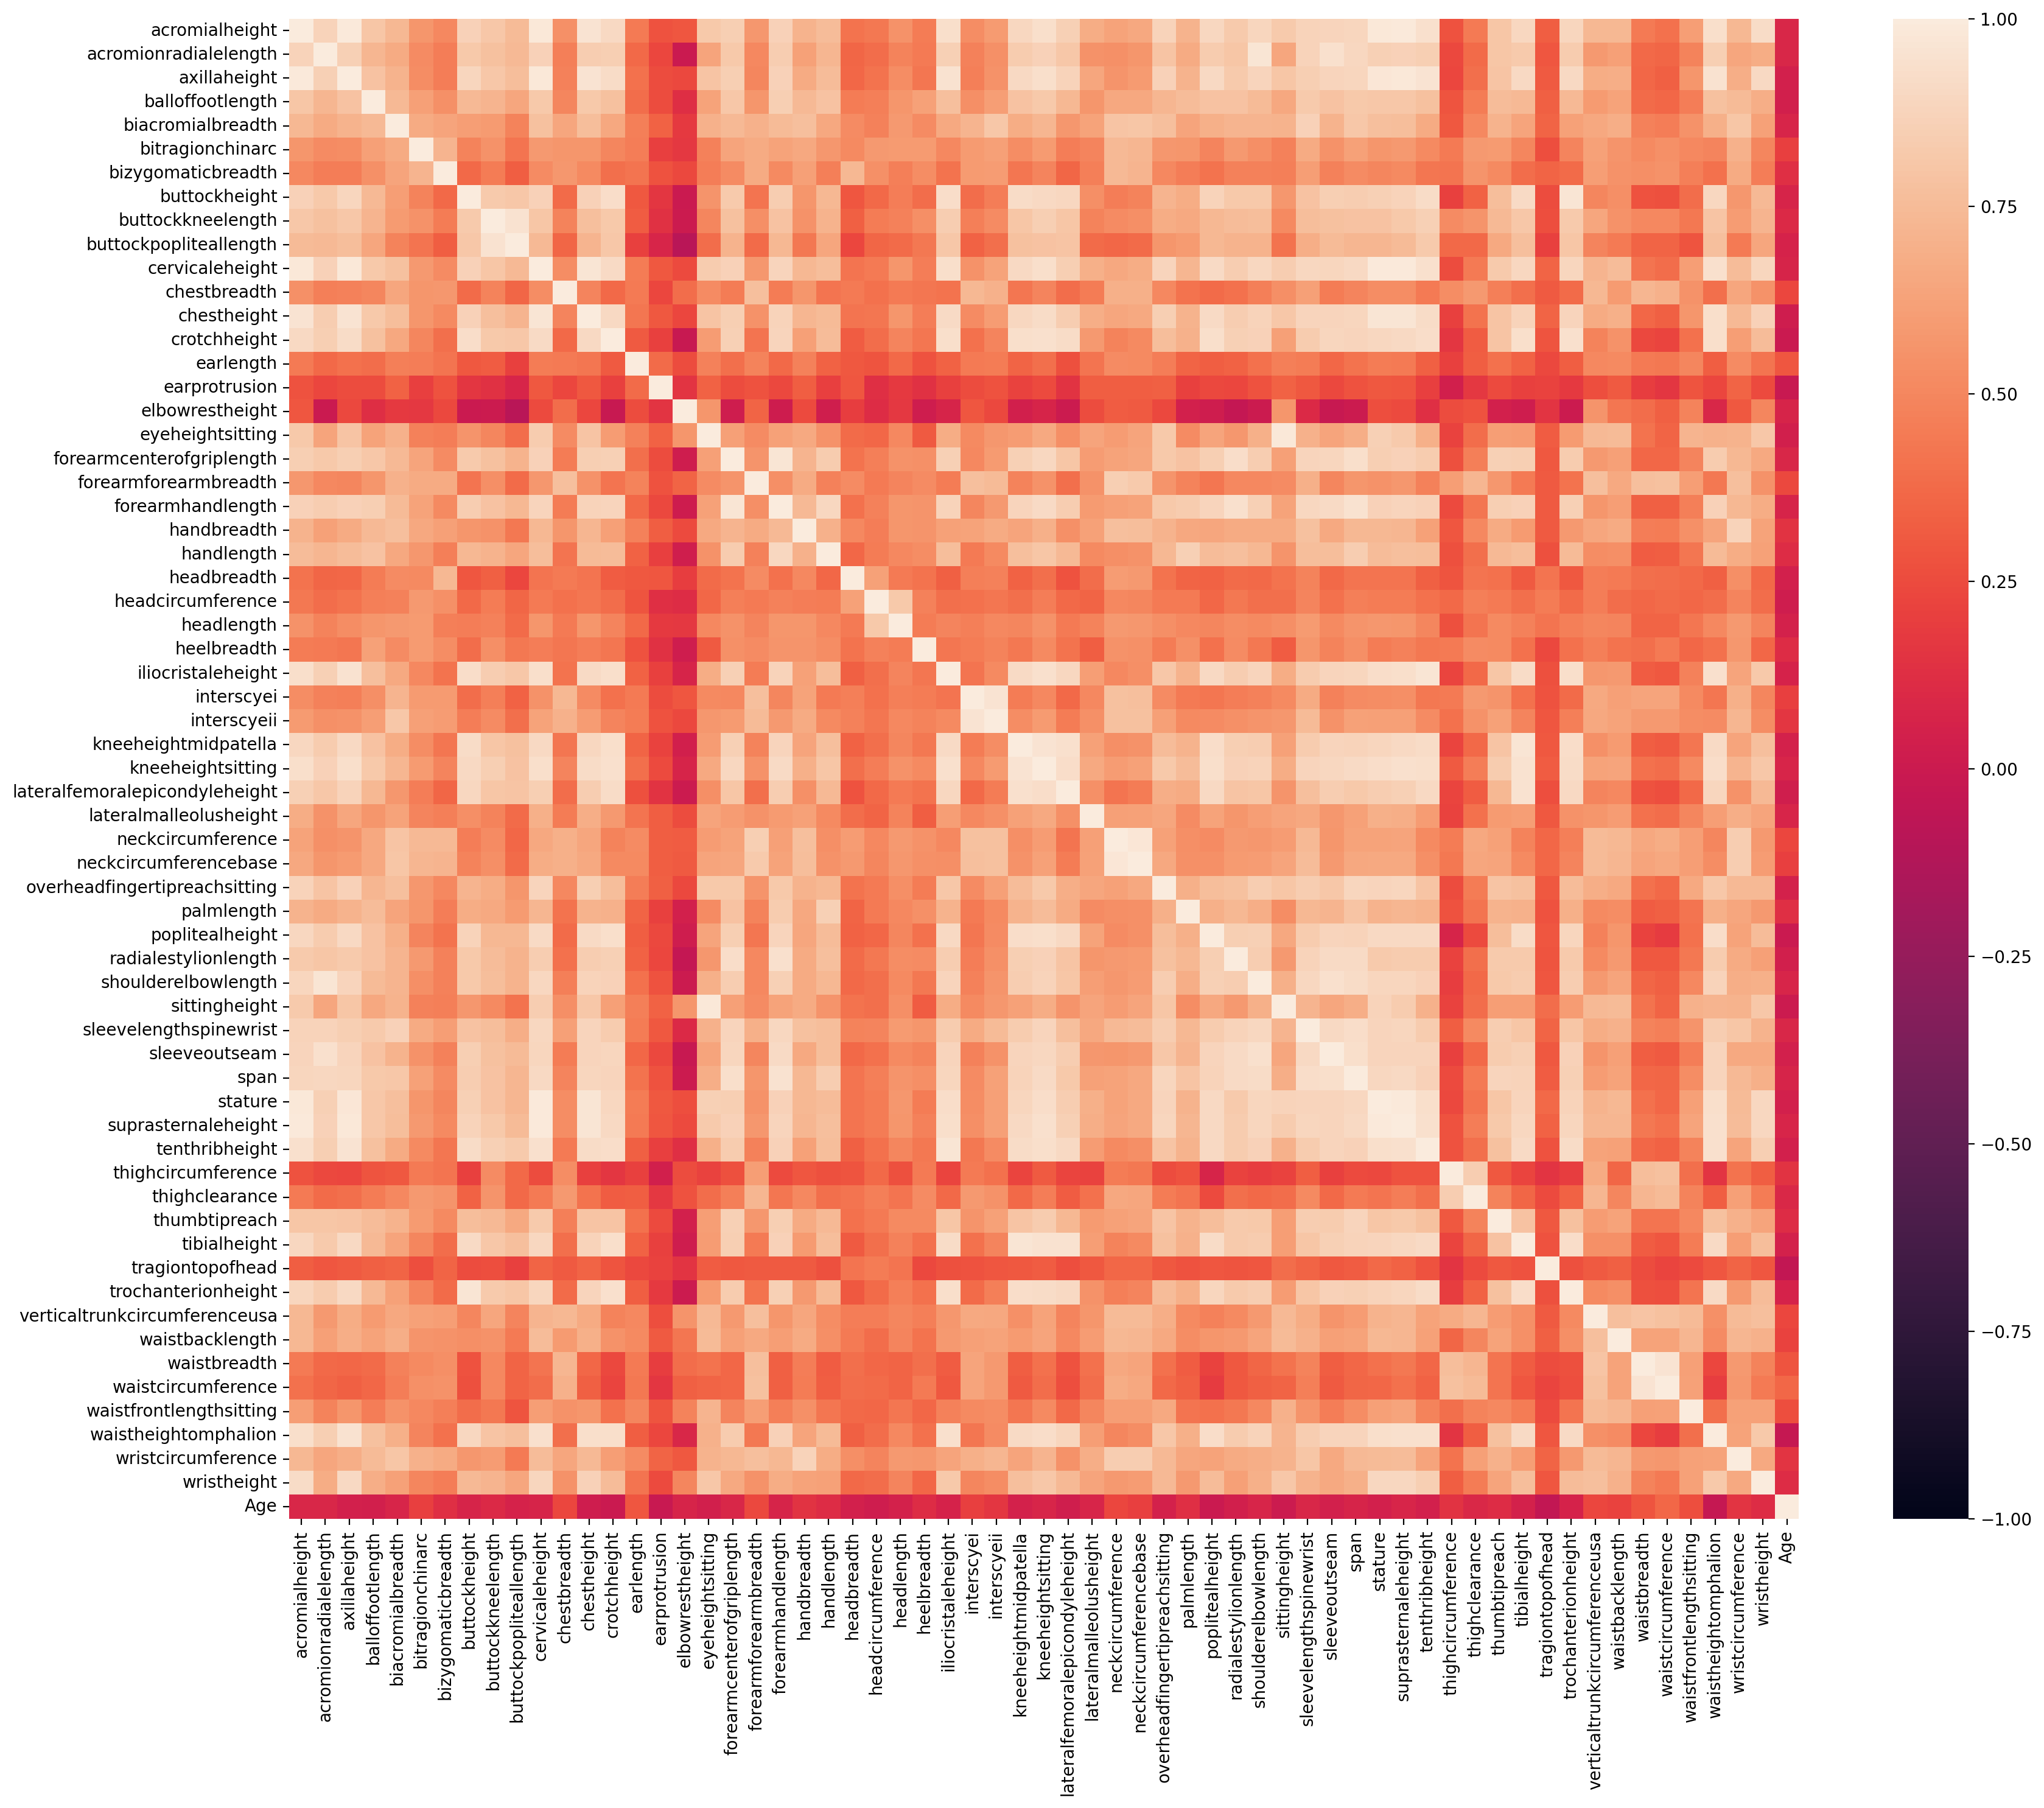

In [16]:
plt.figure(figsize=(20, 16), dpi=200)
sns.heatmap(df_partial.corr(numeric_only=True), vmin=-1, vmax=1);

In [17]:
df_partial.info(max_cols=50)

<class 'pandas.core.frame.DataFrame'>
Index: 5769 entries, 0 to 6067
Columns: 67 entries, acromialheight to DODRace
dtypes: int64(63), object(4)
memory usage: 3.0+ MB


In [18]:
df_partial['SubjectsBirthLocation'].value_counts()

SubjectsBirthLocation
California                417
New York                  411
Texas                     386
Indiana                   264
Florida                   210
Illinois                  210
Oklahoma                  205
Minnesota                 194
Michigan                  194
Mississippi               193
Georgia                   168
Alabama                   164
South Carolina            161
North Carolina            145
Ohio                      139
Louisiana                 136
Pennsylvania              130
Virginia                  113
Massachusetts             109
Wisconsin                  99
Germany                    90
New Jersey                 88
Puerto Rico                88
Missouri                   83
Colorado                   78
Maryland                   78
Arizona                    75
Tennessee                  74
Kentucky                   67
Kansas                     62
Washington                 61
Iowa                       55
South Dakota      

In [19]:
df_partial.shape

(5769, 67)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [20]:
# Encode nominal categorical features
categorical  = ["Gender", "WritingPreference", "SubjectsBirthLocation"]

In [21]:
df_partial["SubjectsBirthLocation"].nunique()

136

In [22]:

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  # MinMaxScaler()

column_trans = column_trans.set_output(transform="pandas")

In [23]:
df_partial.shape

(5769, 67)

In [24]:
# Split the data
X = df_partial.drop(["DODRace"], axis=1)
y = df_partial["DODRace"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [25]:
y_train

5165       White
5393       White
5659       White
3628       White
2914       White
4781       White
632        Black
2268       White
2614    Hispanic
946        White
4579       Black
1997       White
2499       Black
399        White
166        White
4918       White
5592       White
3805       White
827     Hispanic
2101       White
490        White
5863       White
2766       White
6019       White
4397       Black
3030       White
2347       Black
2776       White
4230       Black
4120       White
3568       Black
75         White
3086       White
2451    Hispanic
711        White
1177       White
1169       White
109        White
5292       White
1536       White
1019       White
5392       White
951        White
4666       Black
2464       Black
3121       White
2075       White
663        White
3133       White
1487       White
5031       White
4381       White
5583       Black
1720       White
2094       White
4798       White
4731       Black
2563       Black
3441       Whi

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.


## 1. Logistic model

### Vanilla Logistic Model

In [26]:

sc = StandardScaler()

lr = LogisticRegression()

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [27]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [28]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[227   8  25]
 [  7  70  59]
 [  9  18 731]]
              precision    recall  f1-score   support

       Black       0.93      0.87      0.90       260
    Hispanic       0.73      0.51      0.60       136
       White       0.90      0.96      0.93       758

    accuracy                           0.89      1154
   macro avg       0.85      0.78      0.81      1154
weighted avg       0.89      0.89      0.88      1154


Train_Set
[[ 962   10   66]
 [  24  328  191]
 [  40   63 2931]]
              precision    recall  f1-score   support

       Black       0.94      0.93      0.93      1038
    Hispanic       0.82      0.60      0.69       543
       White       0.92      0.97      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.89      0.83      0.86      4615
weighted avg       0.91      0.91      0.91      4615



### Cross validation

In [29]:

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=10,
    return_train_score=True,
    verbose = 3,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  accuracy: (train=0.915, test=0.874) f1_weighted: (train=0.911, test=0.872) precision_weighted: (train=0.911, test=0.870) recall_weighted: (train=0.915, test=0.874) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END  accuracy: (train=0.915, test=0.883) f1_weighted: (train=0.911, test=0.878) precision_weighted: (train=0.911, test=0.877) recall_weighted: (train=0.915, test=0.883) total time=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END  accuracy: (train=0.919, test=0.872) f1_weighted: (train=0.915, test=0.862) precision_weighted: (train=0.916, test=0.862) recall_weighted: (train=0.919, test=0.872) total time=   0.4s
[CV] END  accuracy: (train=0.911, test=0.916) f1_weighted: (train=0.907, test=0.913) precision_weighted: (train=0.908, test=0.913) recall_weighted: (train=0.911, test=0.916) total time=   0.4s
[CV] END  accuracy: (train=0.913, test=0.898) f1_weighted: (train=0.909, test=0.894) precision_weighted: (train=0.910, test=0.897) recall_weighted: (train=0.913, test=0.898) total time=   0.4s
[CV] END  accuracy: (train=0.915, test=0.876) f1_weighted: (train=0.911, test=0.871) precision_weighted: (train=0.911, test=0.871) recall_weighted: (train=0.915, test=0.876) total time=   0.4s
[CV] END  accuracy: (train=0.914, test=0.909) f1_weighted: (train=0.910, test=0.906) precision_weighted: (train=0.911, test=0.907) recall_weighted: (train=0.914, test=0.909) total time=   0.4s
[CV] END  accuracy: (train=0.914, t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.2s finished


fit_time                   0.433
score_time                 0.039
test_accuracy              0.890
train_accuracy             0.914
test_precision_weighted    0.886
train_precision_weighted   0.911
test_recall_weighted       0.890
train_recall_weighted      0.914
test_f1_weighted           0.886
train_f1_weighted          0.911
dtype: float64

In [30]:


# 'white':1, 'black':2, 'hispanic': 3
f1_hispanic = make_scorer(f1_score, average=None, labels=['Hispanic'])
precision_hispanic = make_scorer(precision_score, average=None, labels=['Hispanic'])
recall_hispanic = make_scorer(recall_score, average=None, labels=['Hispanic'])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [31]:

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True ,verbose = 3
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  f1_hispanic: (train=0.684, test=0.626) precision_hispanic: (train=0.796, test=0.689) recall_hispanic: (train=0.599, test=0.574) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END  f1_hispanic: (train=0.695, test=0.602) precision_hispanic: (train=0.811, test=0.718) recall_hispanic: (train=0.607, test=0.519) total time=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END  f1_hispanic: (train=0.708, test=0.506) precision_hispanic: (train=0.823, test=0.688) recall_hispanic: (train=0.621, test=0.400) total time=   0.4s
[CV] END  f1_hispanic: (train=0.678, test=0.707) precision_hispanic: (train=0.798, test=0.795) recall_hispanic: (train=0.590, test=0.636) total time=   0.3s
[CV] END  f1_hispanic: (train=0.683, test=0.660) precision_hispanic: (train=0.796, test=0.795) recall_hispanic: (train=0.598, test=0.564) total time=   0.4s
[CV] END  f1_hispanic: (train=0.689, test=0.596) precision_hispanic: (train=0.812, test=0.700) recall_hispanic: (train=0.599, test=0.519) total time=   0.3s
[CV] END  f1_hispanic: (train=0.689, test=0.729) precision_hispanic: (train=0.809, test=0.833) recall_hispanic: (train=0.599, test=0.648) total time=   0.4s
[CV] END  f1_hispanic: (train=0.688, test=0.634) precision_hispanic: (train=0.819, test=0.681) recall_hispanic: (train=0.593, test=0.593) total time=   0.4s
[CV] END  f1_hispanic: (train=0.700, test=0.624) precision

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.1s finished


fit_time                   0.430
score_time                 0.040
test_f1_hispanic           0.629
train_f1_hispanic          0.691
test_precision_hispanic    0.741
train_precision_hispanic   0.808
test_recall_hispanic       0.549
train_recall_hispanic      0.603
dtype: float64

# LR with balancing 

In [32]:
lr_b = LogisticRegression(class_weight='balanced')

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr_b)]

pipe_model_b = Pipeline(steps=operations)

pipe_model_b.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression(class_weight='balanced'))])

In [33]:
eval_metric(pipe_model_b, X_train, y_train, X_test, y_test)

Test_Set
[[235  18   7]
 [  7 102  27]
 [ 20  95 643]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       260
    Hispanic       0.47      0.75      0.58       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 967   41   30]
 [  19  452   72]
 [  86  398 2550]]
              precision    recall  f1-score   support

       Black       0.90      0.93      0.92      1038
    Hispanic       0.51      0.83      0.63       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.89      0.86      0.87      4615



### Cross validation

In [34]:
operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"],
    cv=10,
    return_train_score=True,
    verbose = 3,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  accuracy: (train=0.915, test=0.874) f1_weighted: (train=0.911, test=0.872) precision_weighted: (train=0.911, test=0.870) recall_weighted: (train=0.915, test=0.874) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END  accuracy: (train=0.915, test=0.883) f1_weighted: (train=0.911, test=0.878) precision_weighted: (train=0.911, test=0.877) recall_weighted: (train=0.915, test=0.883) total time=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END  accuracy: (train=0.919, test=0.872) f1_weighted: (train=0.915, test=0.862) precision_weighted: (train=0.916, test=0.862) recall_weighted: (train=0.919, test=0.872) total time=   0.4s
[CV] END  accuracy: (train=0.911, test=0.916) f1_weighted: (train=0.907, test=0.913) precision_weighted: (train=0.908, test=0.913) recall_weighted: (train=0.911, test=0.916) total time=   0.4s
[CV] END  accuracy: (train=0.913, test=0.898) f1_weighted: (train=0.909, test=0.894) precision_weighted: (train=0.910, test=0.897) recall_weighted: (train=0.913, test=0.898) total time=   0.4s
[CV] END  accuracy: (train=0.915, test=0.876) f1_weighted: (train=0.911, test=0.871) precision_weighted: (train=0.911, test=0.871) recall_weighted: (train=0.915, test=0.876) total time=   0.4s
[CV] END  accuracy: (train=0.914, test=0.909) f1_weighted: (train=0.910, test=0.906) precision_weighted: (train=0.911, test=0.907) recall_weighted: (train=0.914, test=0.909) total time=   0.4s
[CV] END  accuracy: (train=0.914, t

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.2s finished


fit_time                   0.439
score_time                 0.041
test_accuracy              0.890
train_accuracy             0.914
test_precision_weighted    0.886
train_precision_weighted   0.911
test_recall_weighted       0.890
train_recall_weighted      0.914
test_f1_weighted           0.886
train_f1_weighted          0.911
dtype: float64

In [35]:
operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr_b)]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True ,verbose = 3
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  f1_hispanic: (train=0.637, test=0.549) precision_hispanic: (train=0.516, test=0.424) recall_hispanic: (train=0.832, test=0.778) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END  f1_hispanic: (train=0.634, test=0.589) precision_hispanic: (train=0.510, test=0.507) recall_hispanic: (train=0.836, test=0.704) total time=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] END  f1_hispanic: (train=0.643, test=0.519) precision_hispanic: (train=0.520, test=0.438) recall_hispanic: (train=0.840, test=0.636) total time=   0.4s
[CV] END  f1_hispanic: (train=0.634, test=0.534) precision_hispanic: (train=0.515, test=0.429) recall_hispanic: (train=0.824, test=0.709) total time=   0.4s
[CV] END  f1_hispanic: (train=0.636, test=0.583) precision_hispanic: (train=0.513, test=0.472) recall_hispanic: (train=0.836, test=0.764) total time=   0.4s
[CV] END  f1_hispanic: (train=0.637, test=0.624) precision_hispanic: (train=0.518, test=0.506) recall_hispanic: (train=0.826, test=0.815) total time=   0.4s
[CV] END  f1_hispanic: (train=0.632, test=0.612) precision_hispanic: (train=0.513, test=0.512) recall_hispanic: (train=0.822, test=0.759) total time=   0.4s
[CV] END  f1_hispanic: (train=0.634, test=0.584) precision_hispanic: (train=0.513, test=0.450) recall_hispanic: (train=0.830, test=0.833) total time=   0.4s
[CV] END  f1_hispanic: (train=0.637, test=0.580) precision

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.1s finished


fit_time                   0.435
score_time                 0.039
test_f1_hispanic           0.572
train_f1_hispanic          0.636
test_precision_hispanic    0.466
train_precision_hispanic   0.515
test_recall_hispanic       0.742
train_recall_hispanic      0.831
dtype: float64

### Logistic Model GridsearchCV

In [36]:

operations = [("encoder", column_trans), ("scaler", sc), ("logistic", lr)]
pipe_model = Pipeline(steps=operations)
param_grid = {
    "logistic__C": [0.01, 0.1, 1, 100],  # 100, 1000
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "saga"],
    "logistic__class_weight": ["balanced", None],
}

grid_search = GridSearchCV(
    pipe_model, param_grid, cv=5, scoring=f1_hispanic, return_train_score=True,verbose =3
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.606, test=0.643) total time=   0.2s
[CV 2/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.609, test=0.536) total time=   0.2s
[CV 3/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.597, test=0.597) total time=   0.2s
[CV 4/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.616, test=0.596) total time=   0.2s
[CV 5/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=liblinear;, score=(train=0.613, test=0.598) total time=   0.2s
[CV 1/5] END logistic__C=0.01, logistic__class_weight=balanced, logistic__penalty=l1, logistic__solver=saga;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 100],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [37]:
grid_search.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    solver='liblinear'))])

In [38]:
pd.DataFrame(grid_search.cv_results_).loc[
    grid_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.644
mean_train_score   0.687
Name: 10, dtype: object

In [39]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[235  10  15]
 [  7  91  38]
 [ 14  35 709]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       260
    Hispanic       0.67      0.67      0.67       136
       White       0.93      0.94      0.93       758

    accuracy                           0.90      1154
   macro avg       0.84      0.84      0.84      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 968   15   55]
 [  32  373  138]
 [  66  153 2815]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.69      0.69      0.69       543
       White       0.94      0.93      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.85      0.85      4615
weighted avg       0.90      0.90      0.90      4615



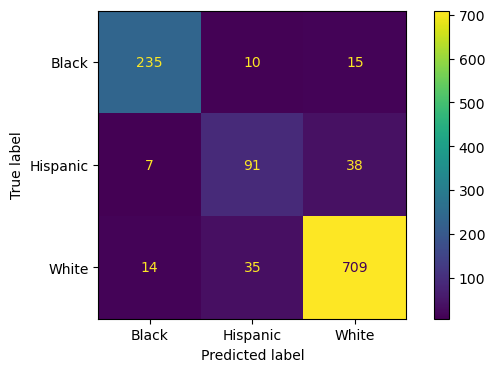

In [40]:
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test);

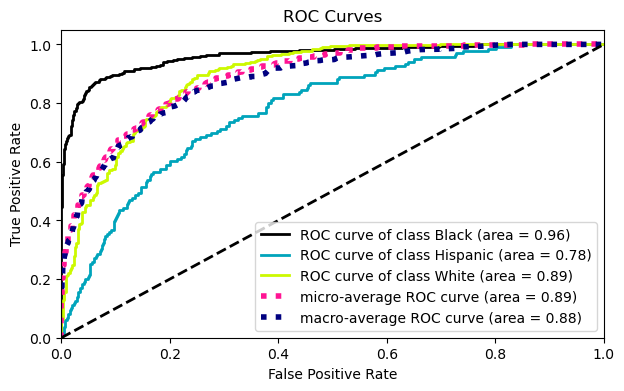

In [41]:

operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(C=0.01, class_weight='balanced', solver='saga')
)]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

In [45]:
y_pred = grid_search.predict(X_test)


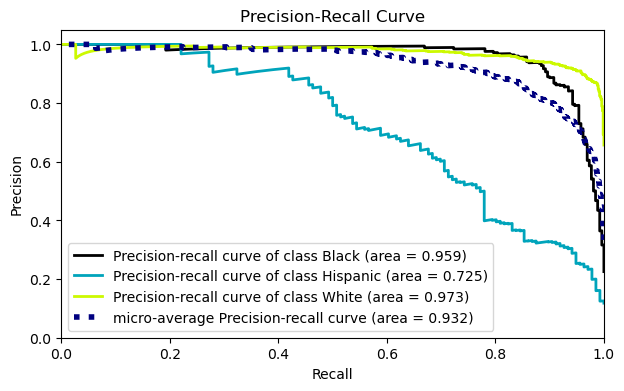

In [46]:

operations = [
    ("encoder", column_trans),
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression(C=0.1, class_weight="balanced", solver="saga")),
]

grid_search = Pipeline(steps=operations)

grid_search.fit(X_train, y_train)

y_pred_proba = grid_search.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [47]:
y_test_dummies = pd.get_dummies(y_test).values  # we do that for the sake of the average_precision_score function.

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.72549831875691

In [48]:


lr_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
lr_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
lr_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model

In [49]:

operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC())]

SVM_pipe_model = Pipeline(steps=operations)


In [50]:
SVM_pipe_model.fit(X_train, y_train)

eval_metric(SVM_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[217   1  42]
 [  4  50  82]
 [  7   9 742]]
              precision    recall  f1-score   support

       Black       0.95      0.83      0.89       260
    Hispanic       0.83      0.37      0.51       136
       White       0.86      0.98      0.91       758

    accuracy                           0.87      1154
   macro avg       0.88      0.73      0.77      1154
weighted avg       0.88      0.87      0.86      1154


Train_Set
[[ 928    8  102]
 [  30  246  267]
 [  13   12 3009]]
              precision    recall  f1-score   support

       Black       0.96      0.89      0.92      1038
    Hispanic       0.92      0.45      0.61       543
       White       0.89      0.99      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.92      0.78      0.82      4615
weighted avg       0.91      0.91      0.90      4615



### cross validation

In [51]:

scores = cross_validate(SVM_pipe_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 5,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_hispanic           0.540
train_f1_hispanic          0.602
test_precision_hispanic    0.884
train_precision_hispanic   0.925
test_recall_hispanic       0.390
train_recall_hispanic      0.447
dtype: float64

## svm with balancing

In [52]:

operations = [("encoder", column_trans), ("scaler", StandardScaler()),
              ("SVC", SVC(class_weight='balanced'))]

SVM_pipe_model_b = Pipeline(steps=operations)

SVM_pipe_model_b.fit(X_train, y_train)

eval_metric(SVM_pipe_model_b, X_train, y_train, X_test, y_test)

Test_Set
[[225  13  22]
 [  5 103  28]
 [ 18  90 650]]
              precision    recall  f1-score   support

       Black       0.91      0.87      0.89       260
    Hispanic       0.50      0.76      0.60       136
       White       0.93      0.86      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.83      0.79      1154
weighted avg       0.87      0.85      0.86      1154


Train_Set
[[ 960   30   48]
 [  18  472   53]
 [  76  362 2596]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92      1038
    Hispanic       0.55      0.87      0.67       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [53]:

scores = cross_validate(SVM_pipe_model_b,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic           0.568
train_f1_hispanic          0.671
test_precision_hispanic    0.469
train_precision_hispanic   0.547
test_recall_hispanic       0.724
train_recall_hispanic      0.869
dtype: float64

###  SVC Model GridsearchCV

In [54]:
param_grid = {'SVC__C': [1, 0.1],
              'SVC__gamma': ["scale", "auto"],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced"]
             }

operations = [("encoder", column_trans), ("scaler", sc),
              ("SVC", SVC(probability=True))]
SVM_pipe_model_gs = Pipeline(steps=operations)

SVM_pipe_model_grid = GridSearchCV(
    SVM_pipe_model_gs, param_grid, cv=5, scoring=recall_hispanic, return_train_score=True,verbose =3
)
SVM_pipe_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END SVC__C=1, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=rbf;, score=(train=0.880, test=0.778) total time=   9.9s
[CV 2/5] END SVC__C=1, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=rbf;, score=(train=0.887, test=0.667) total time=   9.0s
[CV 3/5] END SVC__C=1, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=rbf;, score=(train=0.869, test=0.725) total time=  10.6s
[CV 4/5] END SVC__C=1, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=rbf;, score=(train=0.864, test=0.752) total time=  11.4s
[CV 5/5] END SVC__C=1, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=rbf;, score=(train=0.873, test=0.706) total time=  11.5s
[CV 1/5] END SVC__C=1, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=linear;, score=(train=0.867, test=0.713) total time=  13.9s
[CV 2/5] END SVC__C=1, SVC__class_weight=balanced, SVC__gamma=scale, SVC__kernel=linear;, score=(train=0.851,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             param_grid={'SVC__C': [1, 0.1], 'SVC__class_weight': ['balanced'],
                         'SVC__gamma': ['scale', 'auto'],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [55]:
SVM_pipe_model_grid.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.1, class_weight='balanced', kernel='linear',
                     probability=True))])

In [56]:
SVM_pipe_model_grid.best_params_

{'SVC__C': 0.1,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [57]:
pd.DataFrame(SVM_pipe_model_grid.cv_results_).loc[SVM_pipe_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.731
mean_train_score   0.842
Name: 5, dtype: object

In [58]:
eval_metric(SVM_pipe_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[234  16  10]
 [ 10 102  24]
 [ 22  94 642]]
              precision    recall  f1-score   support

       Black       0.88      0.90      0.89       260
    Hispanic       0.48      0.75      0.59       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 976   31   31]
 [  22  448   73]
 [  93  392 2549]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.92      1038
    Hispanic       0.51      0.83      0.63       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.82      4615
weighted avg       0.89      0.86      0.87      4615



In [59]:
y_pred = SVM_pipe_model_grid.predict(X_test)
y_pred

array(['Black', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

In [60]:
SVM_pipe_model_grid.predict(X_test)

array(['Black', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

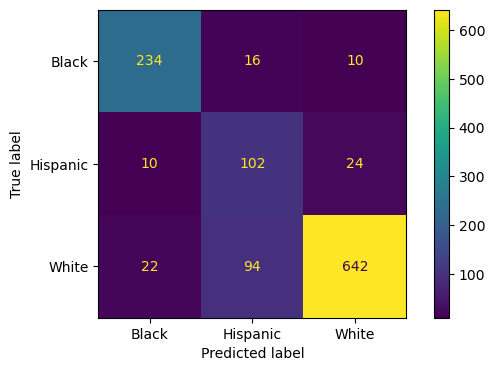

In [61]:
ConfusionMatrixDisplay.from_estimator(SVM_pipe_model_grid, X_test, y_test);

In [62]:
decision_function = SVM_pipe_model_grid.decision_function(X_test)
decision_function

array([[ 2.25981665, -0.23895002,  0.83313189],
       [-0.28931267,  1.20236904,  2.27802646],
       [-0.27696583,  0.79894479,  2.28849138],
       ...,
       [ 2.29503767, -0.28587722,  0.79103679],
       [-0.29553589,  1.24080675,  2.27971147],
       [ 0.79885486, -0.25114522,  2.27356826]])

In [63]:
predict_probe = SVM_pipe_model_grid.predict_proba(X_test)[:,1]
predict_probe


array([0.02713685, 0.04679808, 0.00649564, ..., 0.00049014, 0.04785524,
       0.00773631])

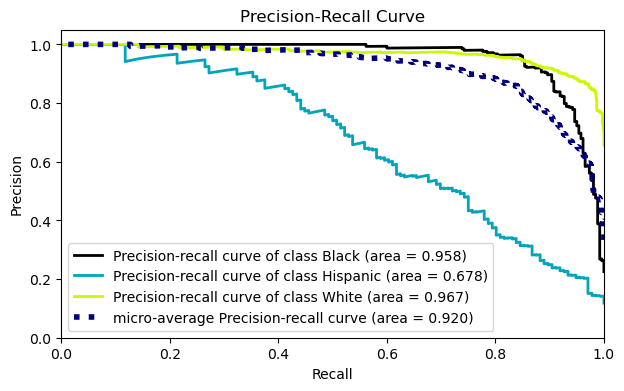

In [64]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=0.01, class_weight='balanced', kernel='linear')),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

# decision_function = model.decision_function(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [65]:
y_test_dummies = pd.get_dummies(y_test).values

In [66]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6780434080872421

In [67]:



svm_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
svm_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
snm_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [68]:

column_trans = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical),
                            remainder='passthrough',verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")


In [69]:



operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]  # max_depth=3

v_model = Pipeline(steps=operations)

v_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

In [70]:
eval_metric(v_model, X_train, y_train, X_test, y_test)

Test_Set
[[192   5  63]
 [  9  10 117]
 [ 19   6 733]]
              precision    recall  f1-score   support

       Black       0.87      0.74      0.80       260
    Hispanic       0.48      0.07      0.13       136
       White       0.80      0.97      0.88       758

    accuracy                           0.81      1154
   macro avg       0.72      0.59      0.60      1154
weighted avg       0.78      0.81      0.77      1154


Train_Set
[[1037    0    1]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### cross validation

In [71]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier( random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_f1_hispanic           0.132
train_f1_hispanic          1.000
test_precision_hispanic    0.685
train_precision_hispanic   1.000
test_recall_hispanic       0.074
train_recall_hispanic      1.000
dtype: float64

## RF - with balancing

In [72]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [73]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[174   2  84]
 [  7   3 126]
 [ 16   2 740]]
              precision    recall  f1-score   support

       Black       0.88      0.67      0.76       260
    Hispanic       0.43      0.02      0.04       136
       White       0.78      0.98      0.87       758

    accuracy                           0.79      1154
   macro avg       0.70      0.56      0.56      1154
weighted avg       0.76      0.79      0.75      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [74]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(max_depth=5, class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        random_state=101))])

In [75]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[205  36  19]
 [ 17  81  38]
 [ 77 238 443]]
              precision    recall  f1-score   support

       Black       0.69      0.79      0.73       260
    Hispanic       0.23      0.60      0.33       136
       White       0.89      0.58      0.70       758

    accuracy                           0.63      1154
   macro avg       0.60      0.66      0.59      1154
weighted avg       0.76      0.63      0.67      1154


Train_Set
[[ 862   92   84]
 [  46  390  107]
 [ 248  814 1972]]
              precision    recall  f1-score   support

       Black       0.75      0.83      0.79      1038
    Hispanic       0.30      0.72      0.42       543
       White       0.91      0.65      0.76      3034

    accuracy                           0.70      4615
   macro avg       0.65      0.73      0.66      4615
weighted avg       0.80      0.70      0.73      4615



### cross validation

In [76]:
operations = [("encoder", column_trans),
              ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]


model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=scoring, 
                        cv = 10,
                        return_train_score=True,
                        verbose =3)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END  f1_hispanic: (train=1.000, test=0.000) precision_hispanic: (train=1.000, test=0.000) recall_hispanic: (train=1.000, test=0.000) total time=   2.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV] END  f1_hispanic: (train=1.000, test=0.036) precision_hispanic: (train=1.000, test=0.500) recall_hispanic: (train=1.000, test=0.019) total time=   2.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[CV] END  f1_hispanic: (train=1.000, test=0.102) precision_hispanic: (train=1.000, test=0.750) recall_hispanic: (train=1.000, test=0.055) total time=   2.2s
[CV] END  f1_hispanic: (train=1.000, test=0.069) precision_hispanic: (train=1.000, test=0.667) recall_hispanic: (train=1.000, test=0.036) total time=   2.2s
[CV] END  f1_hispanic: (train=1.000, test=0.133) precision_hispanic: (train=1.000, test=0.800) recall_hispanic: (train=1.000, test=0.073) total time=   2.2s
[CV] END  f1_hispanic: (train=1.000, test=0.036) precision_hispanic: (train=1.000, test=1.000) recall_hispanic: (train=1.000, test=0.019) total time=   2.2s
[CV] END  f1_hispanic: (train=1.000, test=0.102) precision_hispanic: (train=1.000, test=0.600) recall_hispanic: (train=1.000, test=0.056) total time=   2.2s
[CV] END  f1_hispanic: (train=1.000, test=0.070) precision_hispanic: (train=1.000, test=0.667) recall_hispanic: (train=1.000, test=0.037) total time=   2.3s
[CV] END  f1_hispanic: (train=1.000, test=0.069) precision

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   24.6s finished


test_f1_hispanic           0.069
train_f1_hispanic          1.000
test_precision_hispanic    0.648
train_precision_hispanic   1.000
test_recall_hispanic       0.037
train_recall_hispanic      1.000
dtype: float64

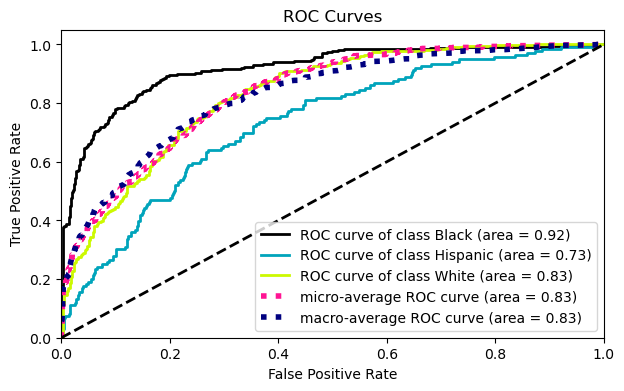

In [77]:
y_pred_probe = pipe_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_probe)
plt.show();

In [78]:
pipe_model["RF_model"].feature_importances_

array([0.00748862, 0.00014996, 0.00908122, 0.0085596 , 0.00200717,
       0.01337589, 0.0034992 , 0.00283709, 0.01454613, 0.00763681,
       0.02511521, 0.06085428, 0.04844506, 0.00725531, 0.00953746,
       0.00506805, 0.01723737, 0.02480279, 0.02895126, 0.07378008,
       0.09091675, 0.01940447, 0.00753866, 0.03369924, 0.00085228,
       0.02738662, 0.00461059, 0.01894893, 0.00932703, 0.03810034,
       0.00875032, 0.00227027, 0.00216883, 0.00365396, 0.00413235,
       0.00807321, 0.01245104, 0.00503756, 0.00492536, 0.00330812,
       0.01418113, 0.00185002, 0.01891301, 0.00632   , 0.07980915,
       0.00132234, 0.00238165, 0.00717538, 0.02090613, 0.00562719,
       0.01274514, 0.00963455, 0.00464883, 0.00406507, 0.00485331,
       0.00521018, 0.0266871 , 0.0110693 , 0.01815569, 0.02210087,
       0.00525288, 0.00926269, 0.01002237, 0.00191349, 0.01816034,
       0.00194772])

In [79]:
features = pipe_model["encoder"].get_feature_names_out()
features

array(['Gender', 'WritingPreference', 'SubjectsBirthLocation',
       'acromialheight', 'acromionradialelength', 'axillaheight',
       'balloffootlength', 'biacromialbreadth', 'bitragionchinarc',
       'bizygomaticbreadth', 'buttockheight', 'buttockkneelength',
       'buttockpopliteallength', 'cervicaleheight', 'chestbreadth',
       'chestheight', 'crotchheight', 'earlength', 'earprotrusion',
       'elbowrestheight', 'eyeheightsitting', 'forearmcenterofgriplength',
       'forearmforearmbreadth', 'forearmhandlength', 'handbreadth',
       'handlength', 'headbreadth', 'headcircumference', 'headlength',
       'heelbreadth', 'iliocristaleheight', 'interscyei', 'interscyeii',
       'kneeheightmidpatella', 'kneeheightsitting',
       'lateralfemoralepicondyleheight', 'lateralmalleolusheight',
       'neckcircumference', 'neckcircumferencebase',
       'overheadfingertipreachsitting', 'palmlength', 'poplitealheight',
       'radialestylionlength', 'shoulderelbowlength', 'sittingheight

In [80]:
rf_feature_imp = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_, 
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

,Feature Importance
eyeheightsitting,0.091
sittingheight,0.080
elbowrestheight,0.074
buttockkneelength,0.061
buttockpopliteallength,0.048
heelbreadth,0.038
forearmhandlength,0.034
earprotrusion,0.029
handlength,0.027
trochanterionheight,0.027


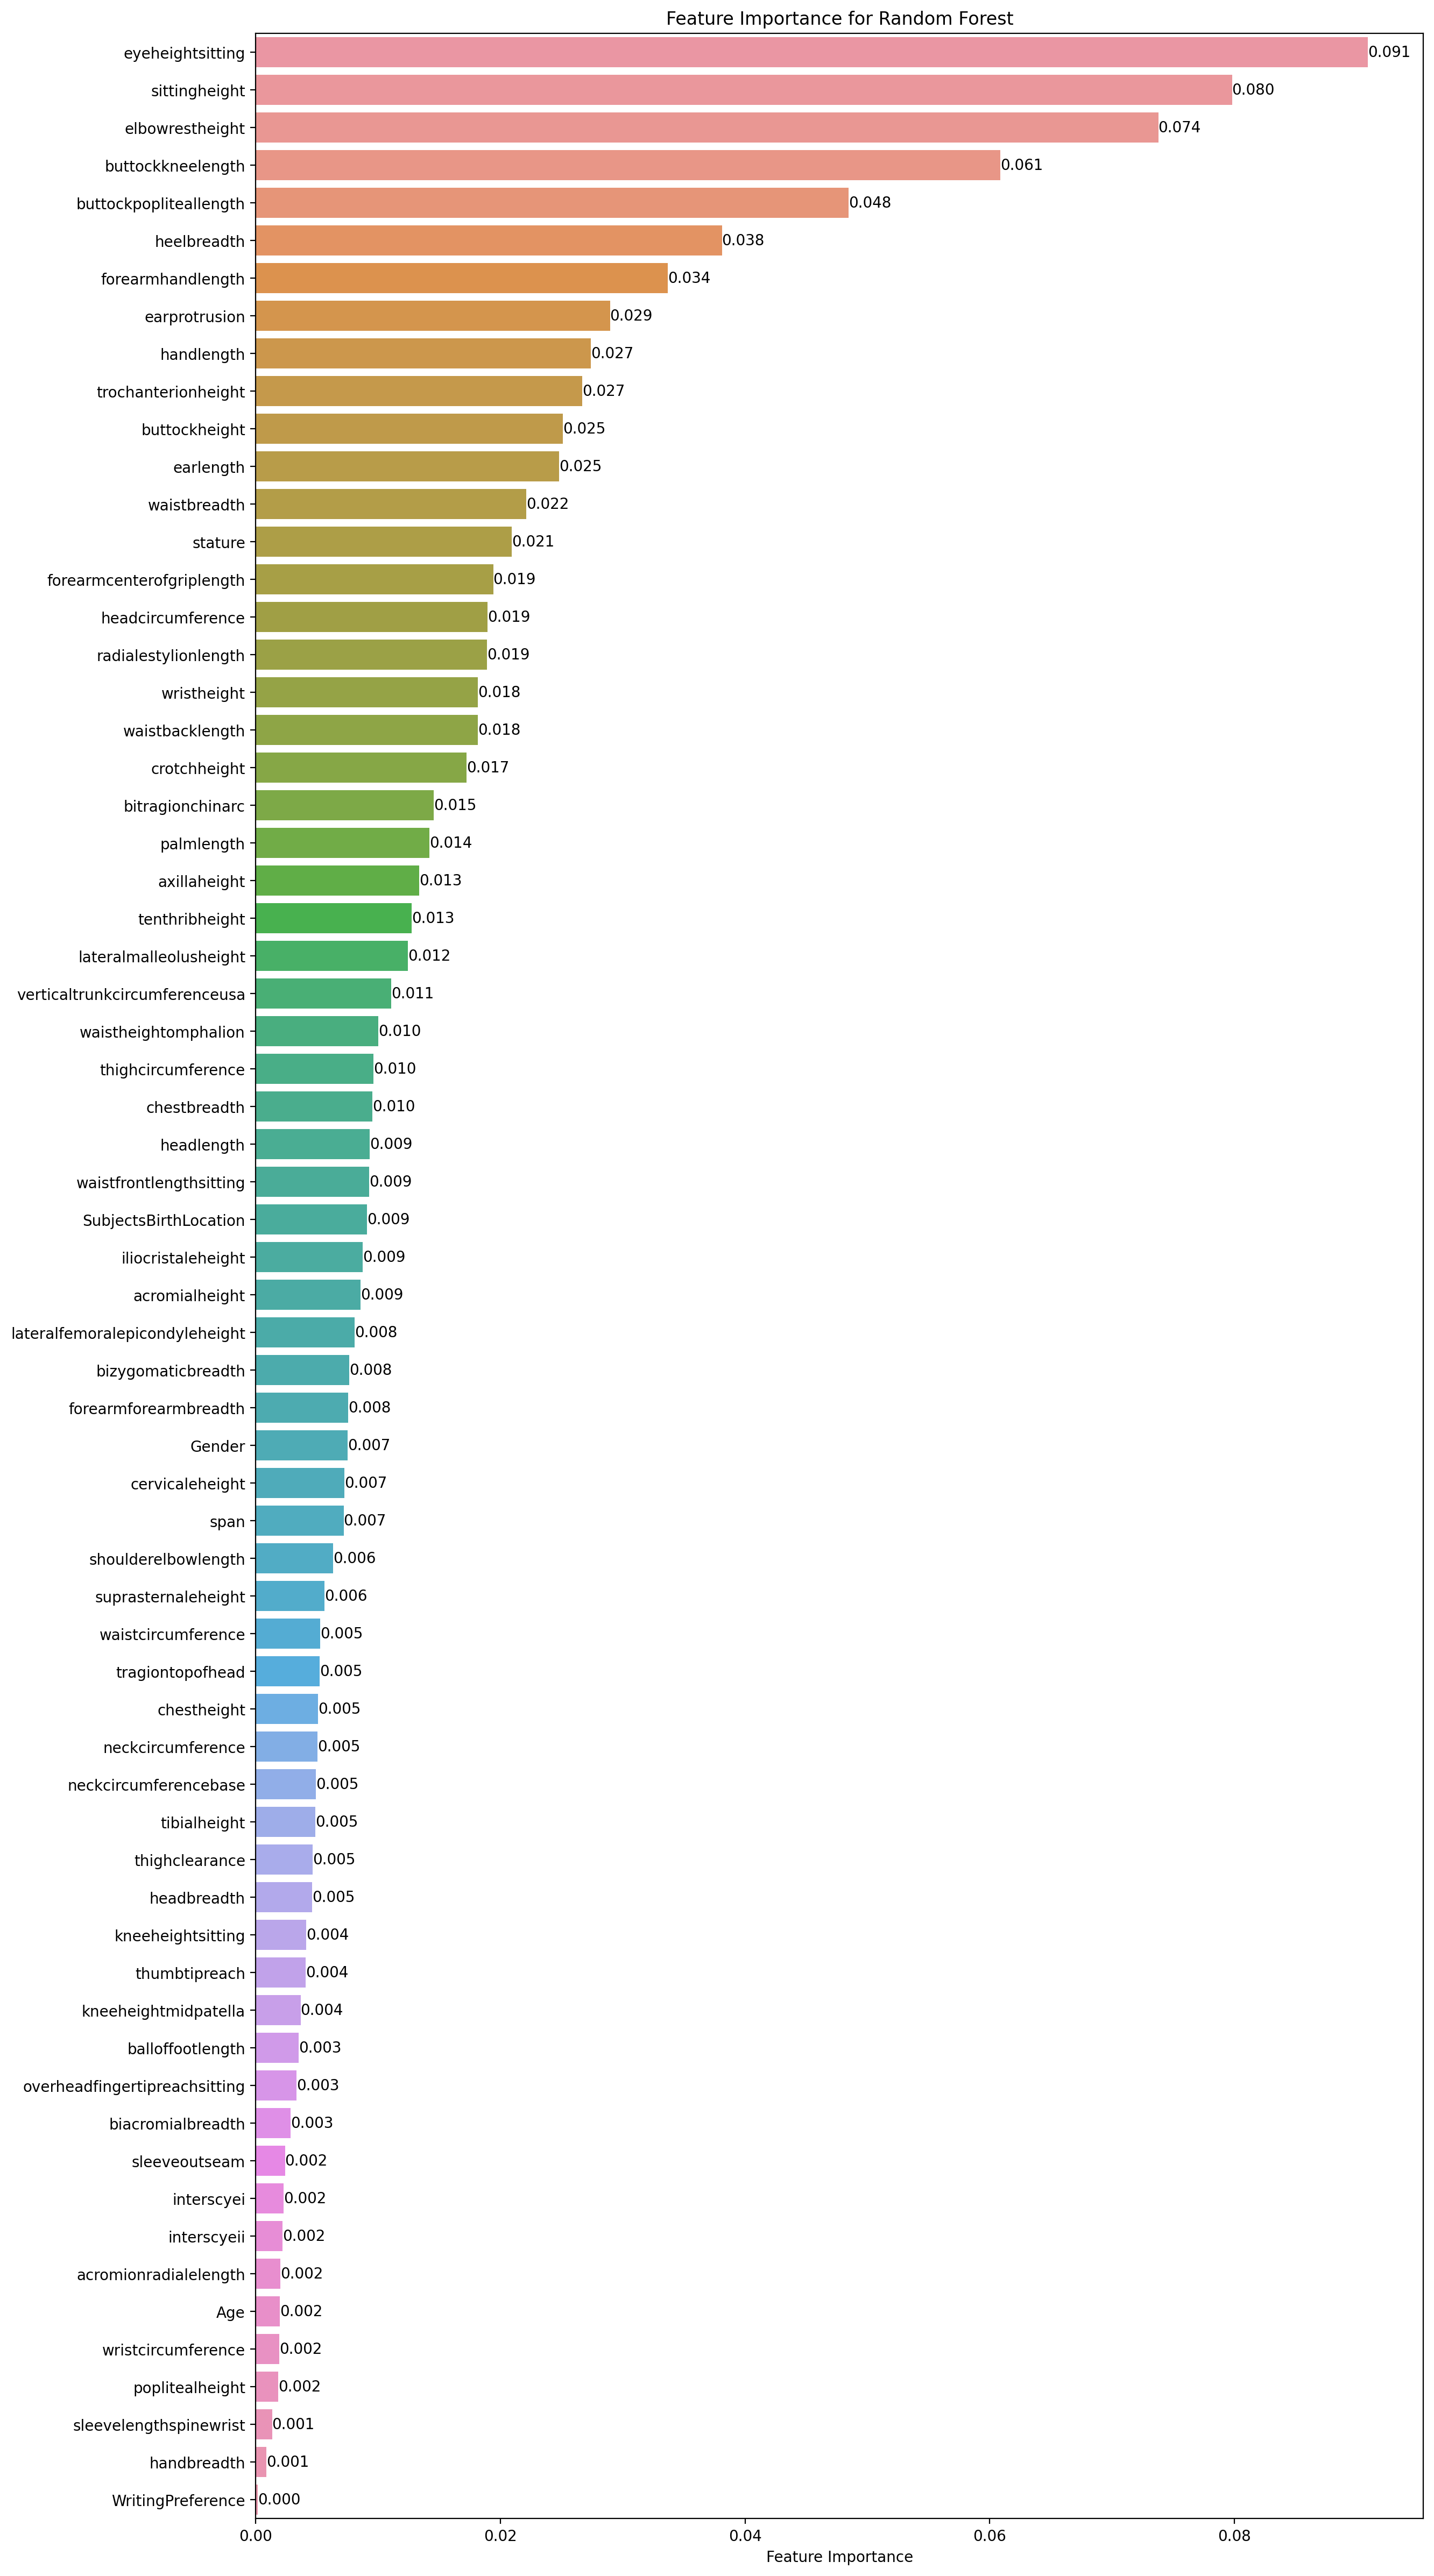

In [81]:

plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], 
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [82]:

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('')
    print(classification_report(y_test,model_pred))
    print('')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree],
              feature_names=features, #features_names=X.columns
              class_names=df.species.unique(),
              filled = True,
              fontsize = 8);


In [83]:
RF_model = RandomForestClassifier(random_state=101, 
                                  max_samples=0.5)

operations = [("encoder", column_trans), 
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)

pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(max_samples=0.5, random_state=101))])

In [84]:
eval_metric(pruned_tree, X_train, y_train, X_test, y_test)

Test_Set
[[192   5  63]
 [ 11  12 113]
 [ 19   6 733]]
              precision    recall  f1-score   support

       Black       0.86      0.74      0.80       260
    Hispanic       0.52      0.09      0.15       136
       White       0.81      0.97      0.88       758

    accuracy                           0.81      1154
   macro avg       0.73      0.60      0.61      1154
weighted avg       0.79      0.81      0.77      1154


Train_Set
[[1005    0   33]
 [  10  430  103]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       0.99      0.97      0.98      1038
    Hispanic       1.00      0.79      0.88       543
       White       0.96      1.00      0.98      3034

    accuracy                           0.97      4615
   macro avg       0.98      0.92      0.95      4615
weighted avg       0.97      0.97      0.97      4615



### RF Model GridsearchCV

In [85]:
param_grid = {
    "RF_model__n_estimators": [300,400],
    "RF_model__max_depth": [2, 3],
    'RF_model__min_samples_split':[18,22],
    'RF_model__max_features': ['auto', 20]
}


In [86]:
RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("encoder", column_trans), 
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=recall_hispanic,
                             n_jobs = -1,
                             verbose=2)

In [87]:
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'WritingPreference',
                                                                          'SubjectsBirthLocation'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__max_features': ['auto', 20],
                         'RF_model__min_samples_split': [18, 22],
                         'RF_model__n_estimators': [300, 400]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [88]:
rf_grid_model.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        max_features='auto',
                                        min_samples_split=18, n_estimators=400,
                                        random_state=101))])

In [89]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3,
 'RF_model__max_features': 'auto',
 'RF_model__min_samples_split': 18,
 'RF_model__n_estimators': 400}

In [90]:
rf_grid_model.best_score_

0.5966190961603806

In [91]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[193  48  19]
 [ 13  85  38]
 [ 90 276 392]]
              precision    recall  f1-score   support

       Black       0.65      0.74      0.69       260
    Hispanic       0.21      0.62      0.31       136
       White       0.87      0.52      0.65       758

    accuracy                           0.58      1154
   macro avg       0.58      0.63      0.55      1154
weighted avg       0.74      0.58      0.62      1154


Train_Set
[[ 768  166  104]
 [  54  356  133]
 [ 304 1028 1702]]
              precision    recall  f1-score   support

       Black       0.68      0.74      0.71      1038
    Hispanic       0.23      0.66      0.34       543
       White       0.88      0.56      0.68      3034

    accuracy                           0.61      4615
   macro avg       0.60      0.65      0.58      4615
weighted avg       0.76      0.61      0.65      4615



In [92]:
rf_grid_model.best_score_


0.5966190961603806

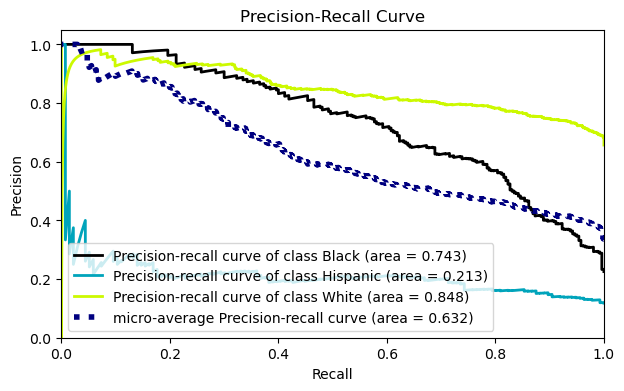

In [93]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [94]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.21321549046994023

In [95]:

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [96]:
# Encode nominal categorical features
# We will do ordinal even though they are nominal since ordinal is better in Tree-based algorithms


In [97]:

column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=-1), categorical),
    remainder="passthrough",
    verbose_feature_names_out=False,
)  

column_trans = column_trans.set_output(transform="pandas")

In [99]:
# Expected: [0 1 2], got ['Black' 'Hispanic' 'White']
df_copy2 = df_partial.copy()
#df_copy["DODRace"] = df_copy.DODRace.map({0: "Black", 1: "Hispanic", 2: "White"})
df_copy2["DODRace"] = df_copy2.DODRace.map({"Black": 0, "Hispanic": 1, "White": 2})

df_copy2["DODRace"]


0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [100]:
df_copy2["DODRace"]

0       2
1       2
2       0
3       2
4       0
       ..
6063    1
6064    1
6065    0
6066    1
6067    1
Name: DODRace, Length: 5769, dtype: int64

In [101]:
# Split the data
X = df_copy2.drop(["DODRace"], axis=1)
y = df_copy2["DODRace"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [102]:

xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byleve...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [103]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[210   7  43]
 [ 10  48  78]
 [ 16  12 730]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       260
           1       0.72      0.35      0.47       136
           2       0.86      0.96      0.91       758

    accuracy                           0.86      1154
   macro avg       0.82      0.71      0.74      1154
weighted avg       0.85      0.86      0.84      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### CV XGBoost Model

In [104]:

# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}

In [105]:


xgb_classifier = XGBClassifier()

# Create a pipeline
pipe_model = Pipeline([("preprocessor", column_trans), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

scores = cross_validate(
    pipe_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()

fit_time                   1.196
score_time                 0.028
test_f1_hispanic           0.456
train_f1_hispanic          1.000
test_precision_hispanic    0.722
train_precision_hispanic   1.000
test_recall_hispanic       0.333
train_recall_hispanic      1.000
dtype: float64

In [106]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[210   7  43]
 [ 10  48  78]
 [ 16  12 730]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       260
           1       0.72      0.35      0.47       136
           2       0.86      0.96      0.91       758

    accuracy                           0.86      1154
   macro avg       0.82      0.71      0.74      1154
weighted avg       0.85      0.86      0.84      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### Random Serach

In [107]:


# Define the hyperparameter space


param_grid = {"xgboost__n_estimators":[50,80],
              "xgboost__max_depth":[3,4],
              "xgboost__learning_rate": [0.8, 0.5],
              "xgboost__subsample":[0.5, 1],
}
xgb_classifier = XGBClassifier()
# Create a pipeline
pipe_model = Pipeline([
    ('preprocessor', column_trans),
    ('xgboost', xgb_classifier)
])


# Create the random search object
random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=param_grid,
    n_iter=1000,
    cv=10,
    verbose=2,
    return_train_score=True,
    scoring=f1_hispanic,
    n_jobs=-1,
)

# Fit the random search model
random_search.fit(X_train, y_train)



Fitting 10 folds for each of 16 candidates, totalling 160 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Gender',
                                                                                'WritingPreference',
                                                                                'SubjectsBirthLocation'])],
                                                                verbose_feature_names_out=False)),
                                             ('xgboost',
                                              XGBClassifier(base_score=None,
                                                            booster=N...
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None, ...))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'xgboost__learning_rate': [0.8, 0.5],
                                        'xgboost__max_depth': [3, 4],
                                        'xgboost__n_estimators': [50, 80],
                                        'xgboost__subsample': [0.5, 1]},
                   return_train_score=True,
                   scoring=make_scorer(f1_score, average=None, labels=[1]),
                   verbose=2)

In [108]:
# Print the best hyperparameters
print(random_search.best_params_)

{'xgboost__subsample': 1, 'xgboost__n_estimators': 80, 'xgboost__max_depth': 4, 'xgboost__learning_rate': 0.5}


In [109]:
pd.DataFrame(random_search.cv_results_).loc[
    random_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.505
mean_train_score   1.000
Name: 15, dtype: object

In [110]:
eval_metric(random_search, X_train, y_train, X_test, y_test)

Test_Set
[[215   5  40]
 [  7  49  80]
 [ 12  13 733]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       260
           1       0.73      0.36      0.48       136
           2       0.86      0.97      0.91       758

    accuracy                           0.86      1154
   macro avg       0.84      0.72      0.75      1154
weighted avg       0.86      0.86      0.85      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [111]:
random_search.best_score_

0.5049791629091908

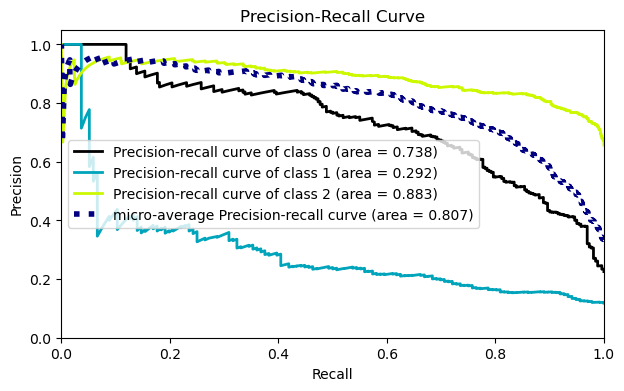

In [112]:


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [113]:
y_test_xgb_dummies = pd.get_dummies(y_test).values

In [114]:
y_pred = random_search.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=[1])

# comparing models 

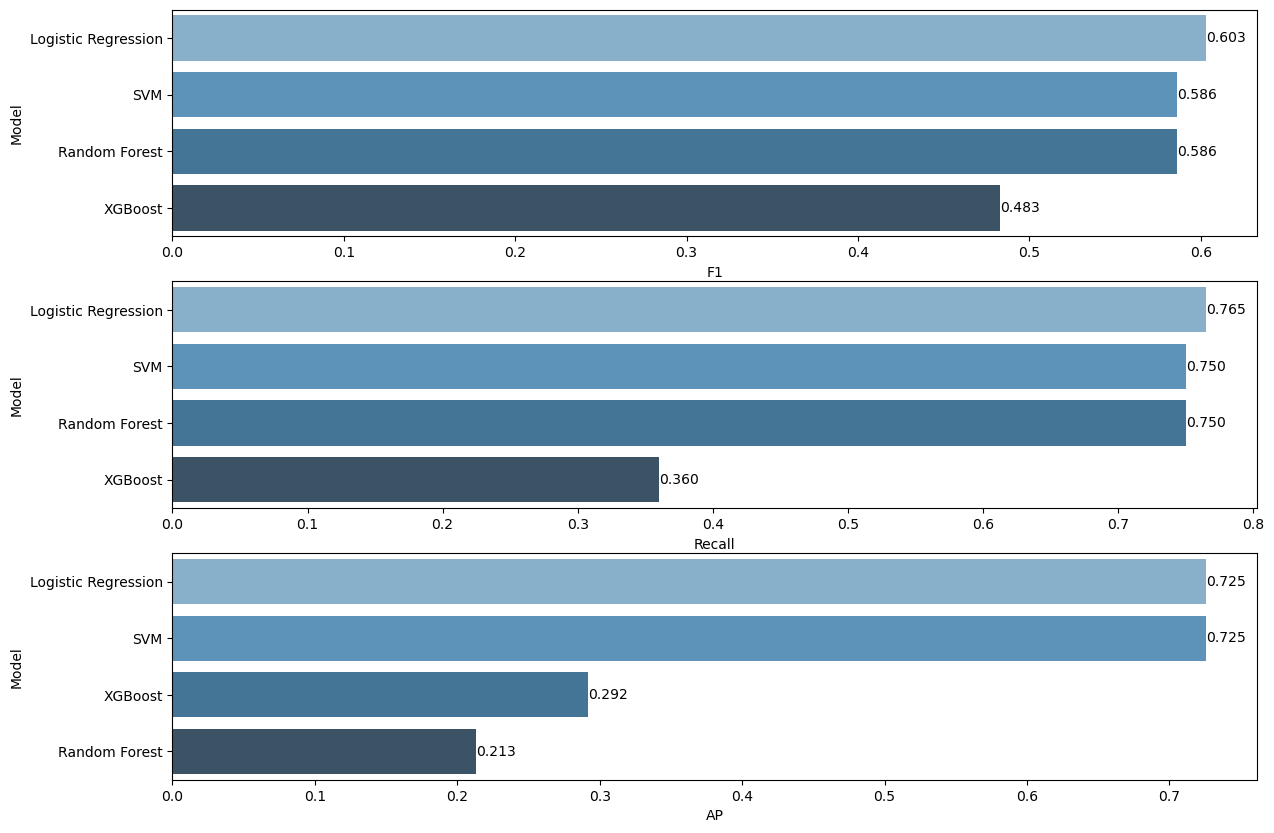

In [115]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [lr_f1[0], svm_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [lr_recall[0], snm_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [lr_AP, svm_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [116]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE

In [117]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical),
    remainder=StandardScaler(),
)

## Logistic Regression "Under Sampling"

In [128]:
X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test) # We shouldn't apply fit_transform to the TEST data.

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train_encoded, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 543), (1, 543), (2, 543)]


In [129]:

lr_resampled = LogisticRegression(C=0.1, class_weight='balanced',
                                    solver='liblinear')

lr_resampled.fit(X_resampled, y_resampled)

LogisticRegression(C=0.1, class_weight='balanced', solver='liblinear')

In [130]:
def eval_metric_(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_resampled)
    y_pred = model.predict(X_test_encoded)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_resampled, y_train_pred))
    print(classification_report(y_resampled, y_train_pred))

In [131]:
eval_metric_(lr_resampled, X_resampled, y_resampled, X_test, y_test)

Test_Set
[[232  20   8]
 [ 12  99  25]
 [ 35 129 594]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       260
           1       0.40      0.73      0.52       136
           2       0.95      0.78      0.86       758

    accuracy                           0.80      1154
   macro avg       0.73      0.80      0.74      1154
weighted avg       0.86      0.80      0.82      1154


Train_Set
[[507  14  22]
 [ 54 403  86]
 [ 10  49 484]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       543
           1       0.86      0.74      0.80       543
           2       0.82      0.89      0.85       543

    accuracy                           0.86      1629
   macro avg       0.86      0.86      0.85      1629
weighted avg       0.86      0.86      0.85      1629



## Logistic Regression "Over Sampling"

## **Remember that while SMOTE can be helpful in many situations, it's not a one-size-fits-all solution, and its effectiveness can vary depending on the specific problem and dataset. It's important to carefully evaluate the performance of your model after using SMOTE and consider other techniques such as adjusting class weights or using different sampling strategies if necessary.**

In [132]:
#Using Somte to over sampling the data

X_train_encoded = column_trans.fit_transform(X_train)
X_test_encoded = column_trans.transform(X_test) # We shouldn't apply fit_transform to the TEST data.

# Apply SMOTE to the training data only
smote = SMOTE(sampling_strategy='auto', random_state=101)
X_resampled_Over, y_resampled_Over = smote.fit_resample(X_train_encoded, y_train)

print(sorted(Counter(y_resampled).items()))

[(0, 543), (1, 543), (2, 543)]


In [134]:
# Implement the LogisticRegression model with the balanced data

lr_resampled = LogisticRegression(C=0.5, class_weight='balanced',
                                    solver='liblinear')

lr_resampled.fit(X_resampled, y_resampled)

LogisticRegression(C=0.5, class_weight='balanced', solver='liblinear')

In [135]:
eval_metric_(lr_resampled, X_resampled_Over, y_resampled_Over, X_test, y_test)

Test_Set
[[233  20   7]
 [ 10 102  24]
 [ 26 116 616]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       260
           1       0.43      0.75      0.55       136
           2       0.95      0.81      0.88       758

    accuracy                           0.82      1154
   macro avg       0.75      0.82      0.77      1154
weighted avg       0.87      0.82      0.84      1154


Train_Set
[[517  11  15]
 [ 32 435  76]
 [  7  40 496]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       543
           1       0.90      0.80      0.85       543
           2       0.84      0.91      0.88       543

    accuracy                           0.89      1629
   macro avg       0.89      0.89      0.89      1629
weighted avg       0.89      0.89      0.89      1629



# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [136]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical),
    remainder=StandardScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [137]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [138]:
X[X.Gender == "Male"].describe()


,acromialheight,acromionradialelength,axillaheight,balloffootlength,biacromialbreadth,bitragionchinarc,bizygomaticbreadth,buttockheight,buttockkneelength,buttockpopliteallength,cervicaleheight,chestbreadth,chestheight,crotchheight,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,forearmforearmbreadth,forearmhandlength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelbreadth,iliocristaleheight,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shoulderelbowlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,Age
count,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000,3899.000
mean,1442.946,335.819,1331.098,201.230,416.004,331.656,142.435,889.500,619.217,504.001,1519.422,289.787,1293.040,847.638,64.171,23.110,244.824,804.885,349.573,580.702,480.929,88.380,193.509,154.184,574.708,199.761,72.565,1063.413,431.394,450.629,489.367,555.225,492.626,73.062,398.192,435.160,1428.469,116.610,430.685,268.314,364.306,918.679,897.179,594.008,1816.629,1758.385,1440.700,1122.444,626.335,180.739,813.085,469.223,131.117,902.587,1666.783,478.018,327.111,943.043,388.017,1058.240,176.169,848.762,30.172
std,62.357,17.281,58.714,10.329,19.075,13.971,6.142,49.412,30.060,26.981,62.430,18.191,56.143,45.923,4.499,2.983,28.714,33.092,17.875,50.830,23.083,4.350,9.881,5.454,15.956,6.855,5.474,51.462,35.081,30.422,27.774,27.522,26.261,5.631,25.626,25.429,67.320,6.211,24.525,15.333,17.980,35.561,39.686,30.573,83.968,67.658,60.419,52.943,58.346,15.546,43.254,26.170,6.135,48.727,88.905,27.662,34.680,111.463,29.361,51.599,8.855,41.139,8.835
min,1194.000,270.000,1106.000,156.000,337.000,281.000,120.000,716.000,518.000,418.000,1269.000,231.000,1088.000,702.000,50.000,14.000,138.000,688.000,290.000,398.000,400.000,74.000,164.000,135.000,516.000,172.000,48.000,854.000,328.000,345.000,400.000,451.000,410.000,54.000,311.000,350.000,1197.000,95.000,350.000,216.000,298.000,797.000,732.000,488.000,1501.000,1491.000,1192.000,917.000,412.000,132.000,650.000,376.000,110.000,731.000,1361.000,383.000,232.000,648.000,293.000,876.000,149.000,695.000,18.000
25%,1401.000,324.000,1291.000,194.000,403.000,322.000,138.000,855.000,599.000,486.000,1478.000,277.000,1255.000,816.000,61.000,21.000,226.000,783.000,337.000,546.000,465.000,85.000,187.000,150.000,564.000,195.000,69.000,1030.000,407.000,430.000,470.000,537.000,475.000,69.000,380.000,418.000,1382.000,113.000,414.000,258.000,352.000,895.000,870.000,574.000,1759.000,1713.000,1401.000,1087.000,588.000,170.000,784.000,451.000,127.000,869.000,1608.000,460.000,301.000,859.000,368.000,1023.000,170.000,820.000,23.000
50%,1441.000,335.000,1330.000,201.000,415.000,332.000,142.000,887.000,618.000,503.000,1518.000,289.000,1291.000,846.000,64.000,23.000,245.000,804.000,349.000,580.000,481.000,88.000,193.000,154.000,575.000,200.000,72.000,1063.000,430.000,450.000,488.000,554.000,492.000,73.000,396.000,433.000,1427.000,116.000,430.000,268.000,364.000,918.000,896.000,593.000,1814.000,1757.000,1438.000,1121.000,626.

In [139]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

acromialheight                   1442.946
acromionradialelength             335.819
axillaheight                     1331.098
balloffootlength                  201.230
biacromialbreadth                 416.004
bitragionchinarc                  331.656
bizygomaticbreadth                142.435
buttockheight                     889.500
buttockkneelength                 619.217
buttockpopliteallength            504.001
cervicaleheight                  1519.422
chestbreadth                      289.787
chestheight                      1293.040
crotchheight                      847.638
earlength                          64.171
earprotrusion                      23.110
elbowrestheight                   244.824
eyeheightsitting                  804.885
forearmcenterofgriplength         349.573
forearmforearmbreadth             580.702
forearmhandlength                 480.929
handbreadth                        88.380
handlength                        193.509
headbreadth                       

In [140]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "Texas"
male_mean_human["WritingPreference"] = "Left hand"

In [141]:
pd.DataFrame(male_mean_human).T

,acromialheight,acromionradialelength,axillaheight,balloffootlength,biacromialbreadth,bitragionchinarc,bizygomaticbreadth,buttockheight,buttockkneelength,buttockpopliteallength,cervicaleheight,chestbreadth,chestheight,crotchheight,earlength,earprotrusion,elbowrestheight,eyeheightsitting,forearmcenterofgriplength,forearmforearmbreadth,forearmhandlength,handbreadth,handlength,headbreadth,headcircumference,headlength,heelbreadth,iliocristaleheight,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shoulderelbowlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,SubjectsBirthLocation,Age,Gender,WritingPreference
mean,1442.946,335.819,1331.098,201.230,416.004,331.656,142.435,889.500,619.217,504.001,1519.422,289.787,1293.040,847.638,64.171,23.110,244.824,804.885,349.573,580.702,480.929,88.380,193.509,154.184,574.708,199.761,72.565,1063.413,431.394,450.629,489.367,555.225,492.626,73.062,398.192,435.160,1428.469,116.610,430.685,268.314,364.306,918.679,897.179,594.008,1816.629,1758.385,1440.700,1122.444,626.335,180.739,813.085,469.223,131.117,902.587,1666.783,478.018,327.111,943.043,388.017,1058.240,176.169,848.762,Texas,30.172,Male,Left hand


In [142]:
final_model.predict(pd.DataFrame(male_mean_human).T)


array([1], dtype=int64)

In [143]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7730634139204317

In [144]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7646988653702111

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___